# Actividad Práctica 04: 
# Análisis Exploratorio de Datos

**José Alejo Eyzaguirre**

Me aparecieron ciertos errores en el código, pero que me permitían correr y seguir. No los pesqué y seguí nomas.

In [246]:
import numpy as np
import pandas as pd
from IPython.display import display 
import matplotlib.pyplot as plt

## Misión 1: Completando Información

En la siguiente etapa debo más que nada hacer la pega de Limpieza y Depuración de Datos. Para ello debo inicialmente importar la base de datos y de pasada convertirla en un DataFrame.

In [2]:
data = pd.read_csv('/Users/alejoeyzaguirre/P.C.H/penguins.csv', sep = ',')
data.head()

,Unnamed: 0,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Aprovecho rápidamente de observar un poco los datos que se tienen por columna, todo esto con el objetivo de familiarizarme con la base de datos.

In [3]:
stats = data.describe()
stats.loc['var'] = data.var().tolist()
stats.loc['skew'] = data.skew().tolist()
stats.loc['kurt'] = data.kurtosis().tolist()

display(stats)

,Unnamed: 0,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,342.000000,342.000000,308.000000,342.000000
mean,171.500000,43.921930,17.151170,200.795455,4201.754386
std,99.448479,5.459584,1.974793,14.084218,801.954536
min,0.000000,32.100000,13.100000,172.000000,2700.000000
25%,85.750000,39.225000,15.600000,190.000000,3550.000000
50%,171.500000,44.450000,17.300000,197.000000,4050.000000
75%,257.250000,48.500000,18.700000,214.000000,4750.000000
max,343.000000,59.600000,21.500000,231.000000,6300.000000
var,9890.000000,29.807054,3.899808,198.365191,643131.077327
skew,0.000000,0.053118,-0.143465,0.368662,0.470329


Además aprovechamos de ver la dispersión de manera gráfica con gráficos de caja y bigote, para cada una de las variables cuantitativas que nos dan en la base de datos:

**1. Culmen Length (mm):**

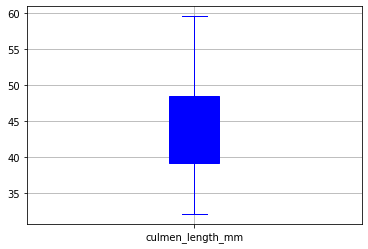

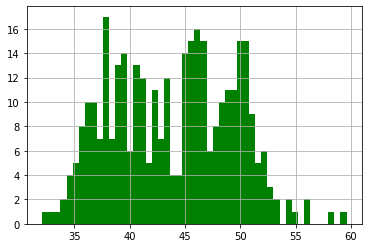

In [4]:
data.boxplot(column='culmen_length_mm', color = "blue", patch_artist = "False")
plt.show()

data['culmen_length_mm'].hist(bins=50, color = "green")
plt.show()

**2. Culmen Depth (mm):**

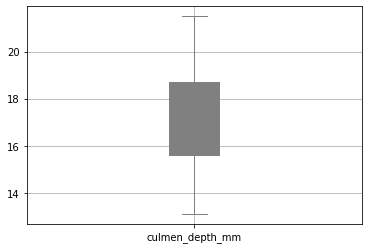

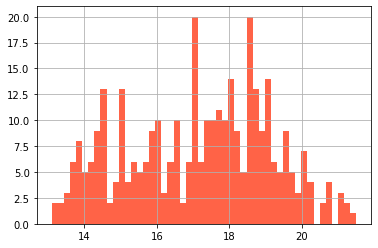

In [5]:
data.boxplot(column='culmen_depth_mm', color = "grey", patch_artist = "False")
plt.show()

data['culmen_depth_mm'].hist(bins=50, color = "tomato")
plt.show()

**3.Flipper Length (mm):**

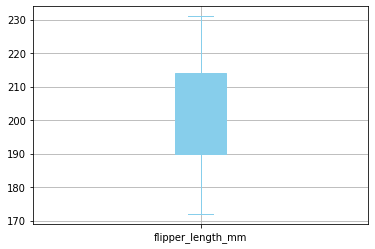

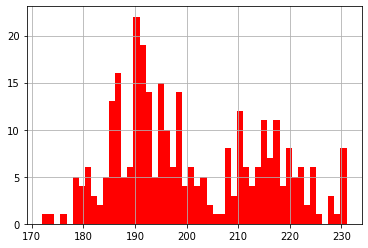

In [6]:
data.boxplot(column='flipper_length_mm', color = "skyblue", patch_artist = "True")
plt.show()

data['flipper_length_mm'].hist(bins=50, color = "red")
plt.show()

**4. Body Mass (g):**



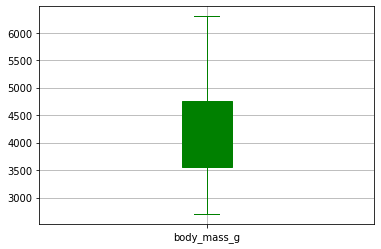

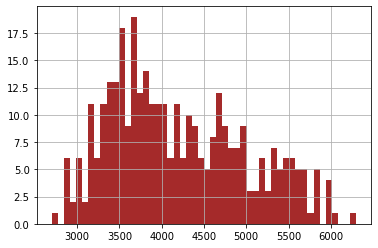

In [63]:
data.boxplot(column='body_mass_g', color = "green", patch_artist = "True")
plt.show()

data['body_mass_g'].hist(bins=50, color = "brown")
plt.show()

Es interesante ver y entender mejor cada una de nuestras features. Por un lado tenemos, variables con comportamientos, que dentro de lo poco que se de pingüinos, al parecer se comportan de manera regular. Tanto en temas de dispersión como en temas de medias. Viendo los boxplots de cada variable cuantitativa, notamos que no existen outliers (valores fuera de los bigotes). Sin embargo tenemos distribuciones no muy bien comportadas (no normales), por lo que habrá que tener ojo al reemplazar los valores nulos.

Sobre las variables cualitativas, podemos ver lo siguiente:

**1. Especies:**

In [8]:
data["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

**2. Isla:**

In [9]:
data["island"].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

**3. Sexo:**

In [10]:
data["sex"].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

Notamos que Sex tiene un dato malo! Lo cambiamos de inmediato.

In [11]:
data = data.replace(".", np.nan)

In [13]:
data["sex"].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

Ya habiendo arreglado esa mala imputación procedemos!

Habiendo realizado la importación, y este rápido análisis de las columnas de la base de datos, debo ahora contabilizar los datos vacíos de la base de datos. Para ello uso la función que se encuentra en la Materia de clases que permite contabilizar el número de datos vacíos por columna o feature.

In [14]:
data.apply(lambda x: sum(x.isnull()),axis=0)

Unnamed: 0            0
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm    36
body_mass_g           2
sex                  11
dtype: int64

### Tratando Valores Vacíos (NaN):

Habiendome ya familiarizado con los datos, puedo ahora proceder de manera más fácil a reemplazar los datos vacíos (NaN). Para ello notamos que se debe hacer este proceso de reemplazo con distintos criterios dependiendo de los tipos de variables y de sus características.

Cómo se vió en clases, se debe primero dividir la base de datos entre data de entrenamiento y data de validación. Por qué se debe hacer esto, porque para reemplazar los valores vacíos de la data de testeo, se debe antes tomar decisiones a partir de la data de entrenamiento. Ya que, como dijo el profesor Hans Löbel en clases: *Las decisiones de limpieza y depuración se hacen con la info del set de entrenamiento. El set de Testeo es víctima de las decisiones tomadas para el set de entrenamiento*.

Por ello procedemos en primer lugar a dividir la data de forma aleatoria en un set de entrenamiento y en uno de testeo, con el comando usado en la ayudantía.

In [69]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3)

In [70]:
train

,Unnamed: 0,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
327,327,Gentoo,Biscoe,53.4,15.8,219.0,5500.0,MALE
227,227,Gentoo,Biscoe,46.7,15.3,219.0,5200.0,MALE
314,314,Gentoo,Biscoe,44.5,14.7,214.0,4850.0,FEMALE
268,268,Gentoo,Biscoe,44.9,13.3,213.0,5100.0,FEMALE
297,297,Gentoo,Biscoe,51.1,16.3,220.0,6000.0,MALE
...,...,...,...,...,...,...,...,...
107,107,Adelie,Biscoe,38.2,20.0,190.0,3900.0,MALE
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
213,213,Chinstrap,Dream,46.8,16.5,189.0,3650.0,FEMALE
260,260,Gentoo,Biscoe,42.7,13.7,208.0,3950.0,FEMALE


In [71]:
test

,Unnamed: 0,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
310,310,Gentoo,Biscoe,47.5,15.0,218.0,4950.0,FEMALE
105,105,Adelie,Biscoe,39.7,18.9,NaN,3550.0,MALE
274,274,Gentoo,Biscoe,46.5,14.4,217.0,4900.0,FEMALE
112,112,Adelie,Biscoe,39.7,17.7,193.0,3200.0,FEMALE
56,56,Adelie,Biscoe,39.0,17.5,NaN,3550.0,FEMALE
...,...,...,...,...,...,...,...,...
171,171,Chinstrap,Dream,49.2,18.2,195.0,4400.0,MALE
8,8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
305,305,Gentoo,Biscoe,50.8,17.3,228.0,5600.0,MALE
332,332,Gentoo,Biscoe,43.5,15.2,213.0,4650.0,FEMALE


Entonces analizamos ahora la data de entrenamiento, en especial los valores vacíos existentes en esa base.

In [72]:
train.apply(lambda x: sum(x.isnull()),axis=0)

Unnamed: 0            0
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm    21
body_mass_g           2
sex                   9
dtype: int64

In [73]:
test.apply(lambda x: sum(x.isnull()),axis=0)

Unnamed: 0            0
species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm    15
body_mass_g           0
sex                   2
dtype: int64

In [74]:
train.describe()

,Unnamed: 0,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,240.000000,238.000000,238.000000,219.000000,238.000000
mean,167.125000,43.536134,17.194958,200.255708,4172.584034
std,97.998084,5.303462,1.985043,13.547348,777.937433
min,1.000000,32.100000,13.100000,174.000000,2700.000000
25%,82.750000,39.000000,15.700000,190.000000,3550.000000
50%,161.500000,43.350000,17.500000,196.000000,4000.000000
75%,249.500000,47.775000,18.800000,212.000000,4700.000000
max,343.000000,59.600000,21.200000,231.000000,6300.000000


Por lo tanto, lo que se hará es tomar un criterio de reemplazo de los datos que sea válido. Vamos revisando por columna, en orden:

**1. Culmen Length (mm):**

Si notamos esta variable, tiene un comportamiento bastante bien distribuido. Bastante centrado y con estadísticos bastante bien comportados (dada la ausencia de outliers). El histograma muestra que los datos, están bastante centrados, pero no distribuyen normal... sino que una especie de distribución con dos jorobas no muy agradable de apreciar. Por estar razones, pese a que se cree que es el camino fácil pero no lo es, y dado que son pocos los datos vacíos se rellenará los datos vacíos con la media de esta columna.

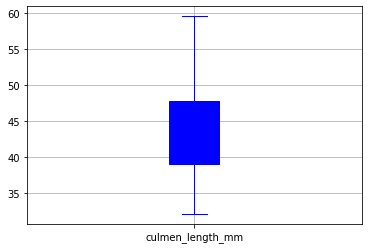

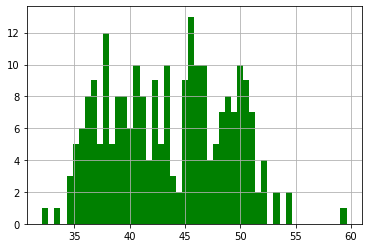

In [75]:
train.boxplot(column='culmen_length_mm', color = "blue", patch_artist = "False")
plt.show()

train['culmen_length_mm'].hist(bins=50, color = "green")
plt.show()

In [76]:
media = train['culmen_length_mm'].mean()
train['culmen_length_mm'].fillna(media.round(1), inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Después de haber hecho el reemplazo, notamos con el cuadro siguiente que la media no cambio (obviamente) pero la desviación estándar sí cambió. Si bien el cambio es leve, son estos los impacto que hay que reducir a la hora de imputar valores faltantes.

In [77]:
train.describe()

,Unnamed: 0,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,240.000000,240.000000,238.000000,219.000000,238.000000
mean,167.125000,43.535833,17.194958,200.255708,4172.584034
std,97.998084,5.281226,1.985043,13.547348,777.937433
min,1.000000,32.100000,13.100000,174.000000,2700.000000
25%,82.750000,39.000000,15.700000,190.000000,3550.000000
50%,161.500000,43.450000,17.500000,196.000000,4000.000000
75%,249.500000,47.725000,18.800000,212.000000,4700.000000
max,343.000000,59.600000,21.200000,231.000000,6300.000000


In [78]:
train.apply(lambda x: sum(x.isnull()),axis=0)

Unnamed: 0            0
species               0
island                0
culmen_length_mm      0
culmen_depth_mm       2
flipper_length_mm    21
body_mass_g           2
sex                   9
dtype: int64

En lo siguiente se hará el reemplazo de los datos vacíos en el set de testeo, según lo visto en clases, cito nuevamente al profesor Hans: *Las decisiones de limpieza y depuración se hacen con la info del set de entrenamiento. El set de Testeo es víctima de las decisiones tomadas para el set de entrenamiento*. 

Además pregunté en el Foro Discord (en el Canal *Dudas de Enunciado* del Lab 04), que si al reemplazar con la media, en alguna columna, debía reemplazar en el set de testeo con la media de la columna respectiva de solo el test de entrenamiento, y el profesor me respondió: "Exacto". 

Digo todo esto, porque al conversar con compañeros, nadie estaba tan al tanto de este "detalle". De hecho publiqué una Issue sobre el tema, y lamentablemente no me la pudieron responder. Así que, si esto no es correcto, lo tomo como supuesto (supongo que de manera válida) para las demás imputaciones de valores.  

In [79]:
test.head()

,Unnamed: 0,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
310,310,Gentoo,Biscoe,47.5,15.0,218.0,4950.0,FEMALE
105,105,Adelie,Biscoe,39.7,18.9,NaN,3550.0,MALE
274,274,Gentoo,Biscoe,46.5,14.4,217.0,4900.0,FEMALE
112,112,Adelie,Biscoe,39.7,17.7,193.0,3200.0,FEMALE
56,56,Adelie,Biscoe,39.0,17.5,NaN,3550.0,FEMALE


In [80]:
# Rellenamos con la media de la columna de la data de entrenamiento.
test['culmen_length_mm'].fillna(media.round(1), inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Notamos que efectivamente se eliminó el dato vacío.

In [82]:
test.apply(lambda x: sum(x.isnull()),axis=0)

Unnamed: 0            0
species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm    15
body_mass_g           0
sex                   2
dtype: int64

**2. Culmen Depth (mm):**

Al igual que la primera variable, esta también tiene un comportamiento bastante bien distribuido según sus estadístcos y gráficos de caja-bigote e histograma, en la data de Entrenamiento. Si bien la distribución, no es muy normal, se cree que es una buena estrategia reemplazar nuevamente los valores vacíos por la media de la columna. Esta decisión se da porque la media es parecida a la mediana (por la ausencia de outliers) y porque no tiene sentido calibrar un modelo de regresión lineal, que prediga el valor, ya que son pocos los datos vacíos a rellenar en esta columna.

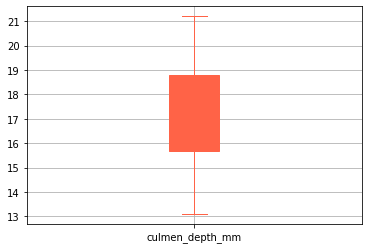

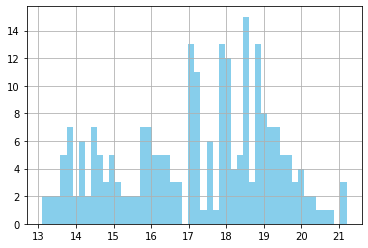

In [83]:
train.boxplot(column='culmen_depth_mm', color = "tomato", patch_artist = "False")
plt.show()

train['culmen_depth_mm'].hist(bins=50, color = "skyblue")
plt.show()

In [84]:
media = train['culmen_depth_mm'].mean()
train['culmen_depth_mm'].fillna(media.round(1), inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Procedemos a rellenar los datos vacíos de esta columna entonces, con la media del set de entrenamiento.

In [85]:
train.apply(lambda x: sum(x.isnull()),axis=0)

Unnamed: 0            0
species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm    21
body_mass_g           2
sex                   9
dtype: int64

In [86]:
train.describe()

,Unnamed: 0,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,240.000000,240.000000,240.00000,219.000000,238.000000
mean,167.125000,43.535833,17.19500,200.255708,4172.584034
std,97.998084,5.281226,1.97672,13.547348,777.937433
min,1.000000,32.100000,13.10000,174.000000,2700.000000
25%,82.750000,39.000000,15.70000,190.000000,3550.000000
50%,161.500000,43.450000,17.50000,196.000000,4000.000000
75%,249.500000,47.725000,18.80000,212.000000,4700.000000
max,343.000000,59.600000,21.20000,231.000000,6300.000000


Nuevamente notamos que la media de esta variable obviamente se mantiene constante y que la desviación estándar, SÍ cambia.

Procedemos a hacer el mismo ajuste a la data de testeo:

In [88]:
test.head()

,Unnamed: 0,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
310,310,Gentoo,Biscoe,47.5,15.0,218.0,4950.0,FEMALE
105,105,Adelie,Biscoe,39.7,18.9,NaN,3550.0,MALE
274,274,Gentoo,Biscoe,46.5,14.4,217.0,4900.0,FEMALE
112,112,Adelie,Biscoe,39.7,17.7,193.0,3200.0,FEMALE
56,56,Adelie,Biscoe,39.0,17.5,NaN,3550.0,FEMALE


In [ ]:
test['culmen_depth_mm'].fillna(media.round(1), inplace = True)

In [90]:
test.apply(lambda x: sum(x.isnull()),axis=0)

Unnamed: 0            0
species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm    15
body_mass_g           0
sex                   2
dtype: int64

**3. Sex:**

Se modifica esta variable primero, porque se quiere tener esta variable arreglada para después poder imputar los valroes de Flipper Length. Primero observemos como se comporta esta variable:

In [91]:
train["sex"].value_counts()

MALE      117
FEMALE    114
Name: sex, dtype: int64

Notamos que si bien la moda es Female, solo hay un pigüino de diferencia, por lo que no sería prudente reemplazar los datos vacíos con la moda de esta variable. Además notamos que hay un dato que corresponde a un punto, procedemos a reemplazar este dato por un NaN.

In [92]:
train["sex"].value_counts()

MALE      117
FEMALE    114
Name: sex, dtype: int64

In [ ]:
train["sex"].fillna(method ='bfill', inplace = True) 

Notamos que ya se corrigió este error en los datos. Ahora podemos seguir imputando los valores correspondientes para los valores faltantes. Lo que se hace es rellenar los datos con el comando interpolate, este permite

In [94]:
train.apply(lambda x: sum(x.isnull()),axis=0)

Unnamed: 0            0
species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm    21
body_mass_g           2
sex                   0
dtype: int64

In [95]:
train["sex"].value_counts()

MALE      123
FEMALE    117
Name: sex, dtype: int64

Notamos que si bien cambió levemente la proporción de sexo de los pingüinos, este cambio no fue muy dramático. Esperemos que sea acorde, este reemplazo, por lo menos en temas de proporciones, no fue tan invasivo en la data de entrenamiento.

Ahora rellenamos la data de testeo con el mismo método.

In [96]:
test["sex"].fillna(method ='bfill', inplace = True) 

In [97]:
test.apply(lambda x: sum(x.isnull()),axis=0)

Unnamed: 0            0
species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm    15
body_mass_g           0
sex                   0
dtype: int64

**4. Flipper Length (mm):**

Esta variable es distinta a las demás. Los datos vacíos son más numerosos, por lo que vale la pena hacer un relleno un poco más complejo. El que propongo es hacer un relleno por media, según raza y según sexo. Esto tiene sentido al revisar el siguiente gráfico de boxplots.

Para esto es necesario usar la función `fage` vista en la materia de clases.

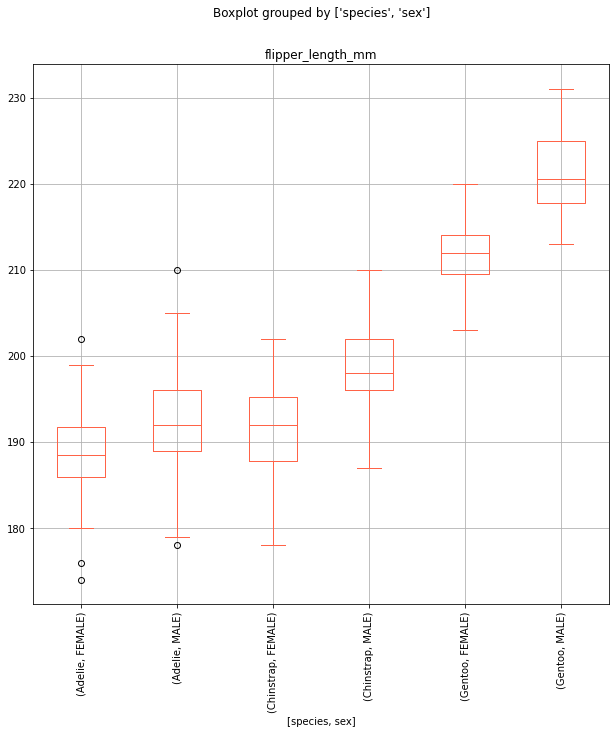

In [98]:
train.boxplot(column='flipper_length_mm', by = ['species','sex'], rot = 90, color = "Tomato", figsize = (10,10))

In [99]:
tabla = train.pivot_table(values='flipper_length_mm', index='species' ,columns='sex', aggfunc=np.median)
tabla

sex,FEMALE,MALE
species,,
Adelie,188.5,192.0
Chinstrap,192.0,198.0
Gentoo,212.0,220.5


In [100]:
def fage(x):
    return tabla.loc[x['species'],x['sex']]

train[train['flipper_length_mm'].isnull()].apply(fage, axis=1)

38     188.5
176    192.0
323    220.5
149    192.0
113    192.0
73     192.0
303    220.5
87     188.5
329    220.5
189    198.0
42     188.5
39     192.0
228    212.0
168    198.0
11     192.0
308    212.0
3      192.0
62     188.5
192    198.0
199    198.0
339    212.0
dtype: float64

In [ ]:
train['flipper_length_mm'].fillna(train[train['flipper_length_mm'].isnull()].apply(fage, axis=1), inplace=True)

In [102]:
train.apply(lambda x: sum(x.isnull()),axis=0)

Unnamed: 0           0
species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          2
sex                  0
dtype: int64

Ahora debemos rellenar la data de Testeo con esta información. Me hubiese encantado rellenar con estas mismas medias calculadas para la data de entrenamiento. Sin embargo, no supe como hacerlo así que mil perdones pero tendré que rellenar con las medias correspondientes al set de entrenamiento : (.

In [105]:
tablo = test.pivot_table(values='flipper_length_mm', index='species' ,columns='sex', aggfunc=np.median)
tablo

sex,FEMALE,MALE
species,,
Adelie,187.0,194.0
Chinstrap,191.0,198.0
Gentoo,215.0,221.5


In [106]:
def fago(x):
    return tablo.loc[x['species'],x['sex']]

test[test['flipper_length_mm'].isnull()].apply(fago, axis=1)

105    194.0
56     187.0
287    221.5
294    215.0
256    215.0
156    198.0
181    198.0
114    187.0
233    221.5
215    198.0
66     187.0
67     194.0
229    221.5
312    215.0
320    215.0
dtype: float64

In [ ]:
test['flipper_length_mm'].fillna(test[test['flipper_length_mm'].isnull()].apply(fago, axis=1), inplace=True)

In [108]:
test.apply(lambda x: sum(x.isnull()),axis=0)

Unnamed: 0           0
species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

**Body Mass (g):**

La siguiente columna, al tener pocos NaN (solo 2) y ser dentro de bien comportada, su distribución es ligeramente más normal que las otras variables. Por lo que basta con rellenar con la media en ambos sets entrenamiento y validación.

In [109]:
media = train['body_mass_g'].mean()
train['body_mass_g'].fillna(media.round(1), inplace = True)

In [110]:
train.apply(lambda x: sum(x.isnull()),axis=0)

Unnamed: 0           0
species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Ahora con el set de entrenamiento (no es necesario, porque no hay observaciones nulas en esta columna en este set), pero el código sería el siguiente:

In [111]:
test['body_mass_g'].fillna(media.round(1), inplace = True)

In [112]:
test.apply(lambda x: sum(x.isnull()),axis=0)

Unnamed: 0           0
species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Podemos ver que finalmente, se limpiaron todos los datos vacíos de la base de datos. Ahora podemos prodecer a la siguiente misión.

## Misión 2: Predicción de la Especie

Ya con los datos completos, su objetivo construir modelos que permitan predecir la especie de un pingüino dadas sus características. En particular, deberá evaluar dos posibles estrategias para construir modelos:

### Predicción Tradicional:

Se debe dividir la data en data del tipo X e y, donde y será la Especie (columna `species`) y las demás formarán parte de los X. También es importante hacer que todas las variables cualitativas pasen a ser cualitativas. Siguiendo los pasos de la ayudantía y lo hecho en clases, entonces, se hace lo siguiente:

Partamos por ajustar las variables cualitativas a cuantitativas.

In [ ]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['species','island','sex']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])

In [ ]:
train.drop("Unnamed: 0", axis = 1, inplace = True )

In [118]:
train.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
327,2,0,53.4,15.8,219.0,5500.0,1
227,2,0,46.7,15.3,219.0,5200.0,1
314,2,0,44.5,14.7,214.0,4850.0,0
268,2,0,44.9,13.3,213.0,5100.0,0
297,2,0,51.1,16.3,220.0,6000.0,1


In [ ]:
var_mod = ['species','island','sex']
le = LabelEncoder()
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [ ]:
test.drop("Unnamed: 0", axis = 1, inplace = True )

In [120]:
test.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
310,2,0,47.5,15.0,218.0,4950.0,0
105,0,0,39.7,18.9,194.0,3550.0,1
274,2,0,46.5,14.4,217.0,4900.0,0
112,0,0,39.7,17.7,193.0,3200.0,0
56,0,0,39.0,17.5,187.0,3550.0,0


Ahora definimos nustros X y nuestro y, para el set de entrenamiento y para el de validación.

In [121]:
X_train = train.drop('species', axis=1)

In [126]:
y_train = train['species']

In [128]:
display(X_train)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
327,0,53.4,15.8,219.0,5500.0,1
227,0,46.7,15.3,219.0,5200.0,1
314,0,44.5,14.7,214.0,4850.0,0
268,0,44.9,13.3,213.0,5100.0,0
297,0,51.1,16.3,220.0,6000.0,1
...,...,...,...,...,...,...
107,0,38.2,20.0,190.0,3900.0,1
4,2,36.7,19.3,193.0,3450.0,0
213,1,46.8,16.5,189.0,3650.0,0
260,0,42.7,13.7,208.0,3950.0,0


In [127]:
display(y_train)

327    2
227    2
314    2
268    2
297    2
      ..
107    0
4      0
213    1
260    2
16     0
Name: species, Length: 240, dtype: int64

Procedemos a hacer lo mismo con nuestro set de Testeo.

In [129]:
X_test = test.drop('species', axis=1)

In [130]:
y_test = test["species"]

In [131]:
display(X_test)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
310,0,47.5,15.0,218.0,4950.0,0
105,0,39.7,18.9,194.0,3550.0,1
274,0,46.5,14.4,217.0,4900.0,0
112,0,39.7,17.7,193.0,3200.0,0
56,0,39.0,17.5,187.0,3550.0,0
...,...,...,...,...,...,...
171,1,49.2,18.2,195.0,4400.0,1
8,2,34.1,18.1,193.0,3475.0,1
305,0,50.8,17.3,228.0,5600.0,1
332,0,43.5,15.2,213.0,4650.0,0


In [132]:
display(y_test)

310    2
105    0
274    2
112    0
56     0
      ..
171    1
8      0
305    2
332    2
320    2
Name: species, Length: 104, dtype: int64

**Empezamos ahora a usar los modelos como se vió en la ayudantía**. 

En la ayudantía no se usó un set de validación, por lo que acá tampoco. No es la idea comparar modelos, sino que mostrar distintos modelos que sirvas (Regresión lineal obviamente no sirve) y ver el rendimiento de cada uno. Es importante tener en cuenta que no porque un modelo tenga mejor rendimiento en el set de testeo será mejor. Para decir eso, es más correcto, evaluar los distintos modelos en un set de validación (una parte del set de train) y ver cual se desempeña mejor. Teniendo el mejor modelo en mano, procedo a evaluar el ganador con el set de Testeo.

### KNN:

Este modelo tiene un 76% de desempeño.

In [133]:
from sklearn import datasets, metrics, neighbors, decomposition, manifold

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
predicted = knn.predict(X_test)

In [134]:
print("Accuracy: %s" % metrics.balanced_accuracy_score(y_test, predicted))


Accuracy: 0.7626804719827976


### Support Vector Machine (SVM):

Veamos como funciona, notamos que la accuracy cayó...! Nuevamente no podemos concluir que conviene usar KNN, porque no fuimos rigurosos al no definir el Validation Set. Seleccionamos el kernel, `rbf`, ya que creo que será mejor que polimomial o lineal.

In [137]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf') 
svm.fit(X_train, y_train)
predicted = svm.predict(X_test)

print("Accuracy: %s" % metrics.accuracy_score(y_test, predicted))
print("Balanced accuracy: %s" % metrics.balanced_accuracy_score(y_test, predicted))

Accuracy: 0.7403846153846154
Balanced accuracy: 0.6271119061816736


### Red Neuronal:

La verdad es que es el que más fe le tengo. Veamos como le va, con 115 nodos escondidos. Sin embargo, no fue mejor que el KNN. 

In [171]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(115,), max_iter=10000) # 10
mlp.fit(X_train, y_train)
predicted = mlp.predict(X_test)

print("Accuracy: %s" % metrics.balanced_accuracy_score(y_test, predicted))

Accuracy: 0.7603675394373068


### Predicción Jerárquica:

Primero debo definir una columna que se llamará "Adelie". En esta todas las variables serán 0 salvo si la observación corresponde a esta misma especie. De esta forma es más posible lograr el famoso *One versus All* que nos piden. La columna 0 corresponde, a la Dummy Adelie. 

In [175]:
dummies = pd.get_dummies(train["species"])

In [176]:
train2 = pd.concat([train, dummies], axis = 1)

In [177]:
train2

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,0,1,2
327,2,0,53.4,15.8,219.0,5500.0,1,0,0,1
227,2,0,46.7,15.3,219.0,5200.0,1,0,0,1
314,2,0,44.5,14.7,214.0,4850.0,0,0,0,1
268,2,0,44.9,13.3,213.0,5100.0,0,0,0,1
297,2,0,51.1,16.3,220.0,6000.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
107,0,0,38.2,20.0,190.0,3900.0,1,1,0,0
4,0,2,36.7,19.3,193.0,3450.0,0,1,0,0
213,1,1,46.8,16.5,189.0,3650.0,0,0,1,0
260,2,0,42.7,13.7,208.0,3950.0,0,0,0,1


In [181]:
train2.drop(1, axis = 1, inplace = True )

In [ ]:
train2.drop(2, axis = 1, inplace = True )

In [187]:
train2.drop("species", axis = 1, inplace = True )

In [188]:
train2

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,0
327,0,53.4,15.8,219.0,5500.0,1,0
227,0,46.7,15.3,219.0,5200.0,1,0
314,0,44.5,14.7,214.0,4850.0,0,0
268,0,44.9,13.3,213.0,5100.0,0,0
297,0,51.1,16.3,220.0,6000.0,1,0
...,...,...,...,...,...,...,...
107,0,38.2,20.0,190.0,3900.0,1,1
4,2,36.7,19.3,193.0,3450.0,0,1
213,1,46.8,16.5,189.0,3650.0,0,0
260,0,42.7,13.7,208.0,3950.0,0,0


Hacemos lo mismo con la data de Testeo.

In [180]:
dummy = pd.get_dummies(test["species"])
test2 = pd.concat([test, dummy], axis = 1)
test2

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,0,1,2
310,2,0,47.5,15.0,218.0,4950.0,0,0,0,1
105,0,0,39.7,18.9,194.0,3550.0,1,1,0,0
274,2,0,46.5,14.4,217.0,4900.0,0,0,0,1
112,0,0,39.7,17.7,193.0,3200.0,0,1,0,0
56,0,0,39.0,17.5,187.0,3550.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
171,1,1,49.2,18.2,195.0,4400.0,1,0,1,0
8,0,2,34.1,18.1,193.0,3475.0,1,1,0,0
305,2,0,50.8,17.3,228.0,5600.0,1,0,0,1
332,2,0,43.5,15.2,213.0,4650.0,0,0,0,1


Ahora debemos asignar a partir de cada set los X e y respectivos.

In [185]:
test2.drop(1, axis = 1, inplace = True )
test2.drop(2, axis = 1, inplace = True )
test2

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,0
310,2,0,47.5,15.0,218.0,4950.0,0,0
105,0,0,39.7,18.9,194.0,3550.0,1,1
274,2,0,46.5,14.4,217.0,4900.0,0,0
112,0,0,39.7,17.7,193.0,3200.0,0,1
56,0,0,39.0,17.5,187.0,3550.0,0,1
...,...,...,...,...,...,...,...,...
171,1,1,49.2,18.2,195.0,4400.0,1,0
8,0,2,34.1,18.1,193.0,3475.0,1,1
305,2,0,50.8,17.3,228.0,5600.0,1,0
332,2,0,43.5,15.2,213.0,4650.0,0,0


In [186]:
test2.drop("species", axis = 1, inplace = True )

Creamos ahora los X_train, y_train, X_test e y_test.

In [189]:
X_train2 = train2.drop(0, axis=1)

In [190]:
y_train2 = train2[0]

In [191]:
X_test2 = test2.drop(0, axis = 1)

In [192]:
y_test2 = test2[0]

In [193]:
X_test2

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
310,0,47.5,15.0,218.0,4950.0,0
105,0,39.7,18.9,194.0,3550.0,1
274,0,46.5,14.4,217.0,4900.0,0
112,0,39.7,17.7,193.0,3200.0,0
56,0,39.0,17.5,187.0,3550.0,0
...,...,...,...,...,...,...
171,1,49.2,18.2,195.0,4400.0,1
8,2,34.1,18.1,193.0,3475.0,1
305,0,50.8,17.3,228.0,5600.0,1
332,0,43.5,15.2,213.0,4650.0,0


### Creación de Modelos:

**1. Regresión Logística:**

Primero partimos con un modelo de Regresión Logística. Tiene un rendimiento bastante bueno! 99%

In [195]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train2,y_train2)
predictions = model.predict(X_test2)
accuracy = metrics.accuracy_score(y_test2, predictions)    
print("Rendimiento : %s" % "{0:.3%}".format(accuracy))

Rendimiento : 99.038%


**2. Red Neuronal:**

Veamos como nos va con este modelo. Tiene un 72% de Accuracy. Esto es bueno, pero llama más la atención la efectividad de la regresión logística.

In [196]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(115,), max_iter=10000) # 10
mlp.fit(X_train2, y_train2)
predicted = mlp.predict(X_test2)

print("Accuracy: %s" % metrics.balanced_accuracy_score(y_test2, predicted))

Accuracy: 0.7230769230769231


### Paso 2 de la Misión:

En este paso se eliminarán de Train y de Test todas las observaciones que sean de la especie Adelaide. Ahora nos quedamos en nuestra data con una columna, que será nuestro y que es 1 si es de la especie "Gentoo" y 0 si es "Chinstrar".

In [218]:
train3 = train[train.species != 0] 

In [219]:
train3

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
327,2,0,53.4,15.8,219.0,5500.0,1
227,2,0,46.7,15.3,219.0,5200.0,1
314,2,0,44.5,14.7,214.0,4850.0,0
268,2,0,44.9,13.3,213.0,5100.0,0
297,2,0,51.1,16.3,220.0,6000.0,1
...,...,...,...,...,...,...,...
296,2,0,47.5,14.2,209.0,4600.0,0
191,1,1,53.5,19.9,205.0,4500.0,1
280,2,0,45.3,13.8,208.0,4200.0,0
213,1,1,46.8,16.5,189.0,3650.0,0


Siguiendo los mismos pasos que antes, creo ahora una columna dummies para la especie. 

In [220]:
dummies = pd.get_dummies(train3["species"])

In [221]:
train4 = pd.concat([train3, dummies], axis = 1)

In [222]:
train4

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,1,2
327,2,0,53.4,15.8,219.0,5500.0,1,0,1
227,2,0,46.7,15.3,219.0,5200.0,1,0,1
314,2,0,44.5,14.7,214.0,4850.0,0,0,1
268,2,0,44.9,13.3,213.0,5100.0,0,0,1
297,2,0,51.1,16.3,220.0,6000.0,1,0,1
...,...,...,...,...,...,...,...,...,...
296,2,0,47.5,14.2,209.0,4600.0,0,0,1
191,1,1,53.5,19.9,205.0,4500.0,1,1,0
280,2,0,45.3,13.8,208.0,4200.0,0,0,1
213,1,1,46.8,16.5,189.0,3650.0,0,1,0


In [225]:
train4 = train4.drop("species", axis = 1)

In [ ]:
train4 = train4.drop(2, axis = 1)

In [228]:
train4

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,1
327,0,53.4,15.8,219.0,5500.0,1,0
227,0,46.7,15.3,219.0,5200.0,1,0
314,0,44.5,14.7,214.0,4850.0,0,0
268,0,44.9,13.3,213.0,5100.0,0,0
297,0,51.1,16.3,220.0,6000.0,1,0
...,...,...,...,...,...,...,...
296,0,47.5,14.2,209.0,4600.0,0,0
191,1,53.5,19.9,205.0,4500.0,1,1
280,0,45.3,13.8,208.0,4200.0,0,0
213,1,46.8,16.5,189.0,3650.0,0,1


Hago lo mismo con mi data de Testeo.

In [232]:
test3 = test[test.species != 0] 

In [233]:
test3

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
310,2,0,47.5,15.0,218.0,4950.0,0
274,2,0,46.5,14.4,217.0,4900.0,0
173,1,1,48.5,17.5,191.0,3400.0,1
287,2,0,49.5,16.2,221.5,5800.0,1
301,2,0,52.5,15.6,221.0,5450.0,1
...,...,...,...,...,...,...,...
307,2,0,51.3,14.2,218.0,5300.0,1
171,1,1,49.2,18.2,195.0,4400.0,1
305,2,0,50.8,17.3,228.0,5600.0,1
332,2,0,43.5,15.2,213.0,4650.0,0


In [234]:
dummy = pd.get_dummies(test3["species"])

In [235]:
test4 = pd.concat([test3, dummy], axis = 1)

In [236]:
test4

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,1,2
310,2,0,47.5,15.0,218.0,4950.0,0,0,1
274,2,0,46.5,14.4,217.0,4900.0,0,0,1
173,1,1,48.5,17.5,191.0,3400.0,1,1,0
287,2,0,49.5,16.2,221.5,5800.0,1,0,1
301,2,0,52.5,15.6,221.0,5450.0,1,0,1
...,...,...,...,...,...,...,...,...,...
307,2,0,51.3,14.2,218.0,5300.0,1,0,1
171,1,1,49.2,18.2,195.0,4400.0,1,1,0
305,2,0,50.8,17.3,228.0,5600.0,1,0,1
332,2,0,43.5,15.2,213.0,4650.0,0,0,1


In [237]:
test4 = test4.drop("species", axis = 1)

In [238]:
test4 = test4.drop(2, axis = 1)

In [239]:
test4

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,1
310,0,47.5,15.0,218.0,4950.0,0,0
274,0,46.5,14.4,217.0,4900.0,0,0
173,1,48.5,17.5,191.0,3400.0,1,1
287,0,49.5,16.2,221.5,5800.0,1,0
301,0,52.5,15.6,221.0,5450.0,1,0
...,...,...,...,...,...,...,...
307,0,51.3,14.2,218.0,5300.0,1,0
171,1,49.2,18.2,195.0,4400.0,1,1
305,0,50.8,17.3,228.0,5600.0,1,0
332,0,43.5,15.2,213.0,4650.0,0,0


In [240]:
X_train4 = train4.drop(1,axis=1)

In [241]:
y_train4 = train4[1]

In [242]:
X_test4 = test4.drop(1,axis=1)

In [243]:
y_test4 = test4[1]

### Creación de Modelos:

**Regresión Logística:**

Veamos como nos va: Upaa tenemos un rendimiento buenísimo, de 100%! Nuestro modelo esta muy bueno.

In [244]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train4,y_train4)
predictions = model.predict(X_test4)
accuracy = metrics.accuracy_score(y_test4, predictions)    
print("Rendimiento : %s" % "{0:.3%}".format(accuracy))

Rendimiento : 100.000%


**Red Neuronal:**

Veamos como nos va con 115 hidden layers. Rendimiento de 50%. Peor que regresión logística.

In [245]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(115,), max_iter=10000) # 10
mlp.fit(X_train4, y_train4)
predicted = mlp.predict(X_test4)

print("Accuracy: %s" % metrics.balanced_accuracy_score(y_test4, predicted))

Accuracy: 0.5
